In [12]:
# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [13]:
# load data
original_data_import = pd.read_csv('../../data/OriginalData.csv')

Drop data

In [14]:
# Keep these columns dropped
keep_dropped = ['gics_sub_industry_name', 'gics_industry_name', 'gics_industry_group_name', 'gics_industry', 'gics_sector']
# Test dropping these columns
test_dropped = ['Year']

dataframe = original_data_import.drop(keep_dropped, axis=1)
#dataframe = original_data_import.drop(test_dropped, axis=1)

Cast data

In [15]:
# Cast date data
dataframe['Dates'] = pd.to_datetime(dataframe['Dates'])
dataframe['DATE_OF_LAST_EXECUTIVE_CHANGE'] = pd.to_datetime(dataframe['DATE_OF_LAST_EXECUTIVE_CHANGE'])
dataframe['DATE_OF_LAST_BOD_CHANGE'] = pd.to_datetime(dataframe['DATE_OF_LAST_BOD_CHANGE'])

Produce correlation matrix

In [16]:
# Copy data to drop columns from
temp_dataframe = dataframe
temp_dataframe.drop(['symbol', 'gics_sector_name'], axis=1, inplace=True)

In [17]:
corr_matrix = pd.DataFrame.corr(temp_dataframe)
corr_matrix.to_csv('../../out/.../correlation_matrix/correlation_matrix.csv', index=True)


fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(corr_matrix, cmap='inferno')                 
plt.colorbar(cax)

# Setting ticks every 5th column
num_cols = corr_matrix.shape[1]
ax.set_xticks(range(0, num_cols))
ax.set_yticks(range(0, num_cols))

# Displaying the column indices as labels
ax.set_xticklabels(range(0, num_cols))
ax.set_yticklabels(range(0, num_cols))

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('Feature correlation_matrix')
plt.show()

OSError: Cannot save file into a non-existent directory: '../../out/.../correlation_matrix'

One hot encoding

In [8]:
# Symbols and sector name are to be one hot encoded 
ohe = OneHotEncoder()
ohe_dataframe = ohe.fit_transform(dataframe)

Apply elbow method

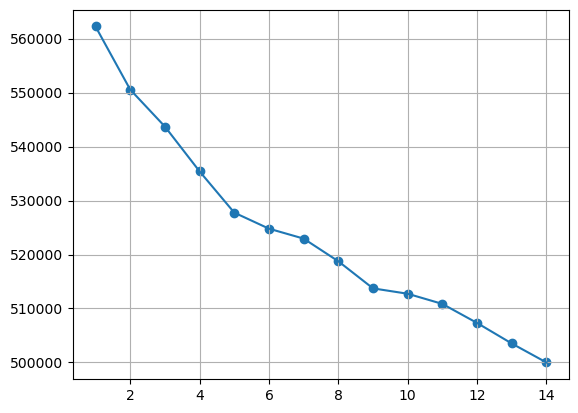

In [11]:
inertia = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(ohe_dataframe)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,15),inertia)
plt.scatter(range(1,15),inertia)
plt.grid()
plt.x_label = 'Number of clusters'
plt.y_label = 'Inertia'
plt.show()